# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


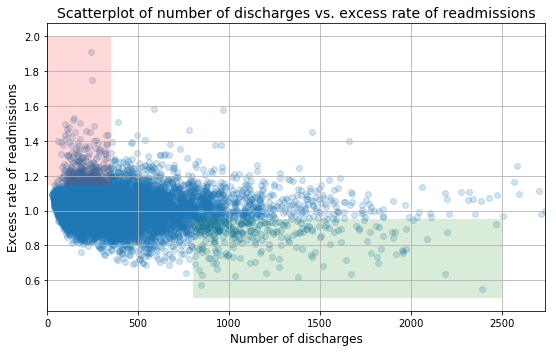

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### A. Do you agree with the above analysis and recommendations? Why or why not? ###

I do not agree with the analysis and recommendations as they just present the mean and percentage of excess readmission rate that is grater than 1, instead they should provide statistical evidences supporting their hypothesis. 

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis: ###

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  $\alpha$  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does      this change your recommendation to the client?
5. Look at the scatterplot above.
   What are the advantages and disadvantages of using this plot to convey information?
   Construct another plot that conveys the same information in a more direct manner.

__$H_0$__ :There is no difference between excess readmission rate in both groups.

__$H_1$__ :There is a difference.

In [7]:
# Look of the dataframe we have.
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


Lets examin __discharges < 100__ and __>1000:__

In [8]:
df=clean_hospital_read_df
dfdis= df['Number of Discharges']

In [9]:
dfdis.head()

16857    0
14582    0
15606    0
15615    0
14551    0
Name: Number of Discharges, dtype: int64

In [10]:
df=clean_hospital_read_df
dfdis= df['Number of Discharges']

In [11]:
print ("The number of hospitals with a number of discharges < 100 is :", len(dfdis[(dfdis<100) & (dfdis>0)]))
print ("The number of hospitals with a number of discharges > 1000 is :", len(dfdis[(dfdis>1000)]))

The number of hospitals with a number of discharges < 100 is : 1188
The number of hospitals with a number of discharges > 1000 is : 463


#### Now Let us check the statistics provided ####

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [12]:
# Calculation to check above
df100 = df[(df['Number of Discharges']<100) & (df['Number of Discharges']>0)]

# 63% have excess readmission rate greater than 1
a= len(df100) #number of hospitals with <100
ratio= df100[(df100["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_100 = round(df100["Excess Readmission Ratio"].mean(),4)

print("The mean of excess readmission rate is : ",mean_100," and the excess readmition rate is: "
       ,percentage, '%')

The mean of excess readmission rate is :  1.0226  and the excess readmition rate is:  63.22 %


In [13]:
# Calculation to check above
df1000 = df[(df['Number of Discharges'] > 1000)]

# 44% have excess readmission rate greater than 1
a= len(df1000) #number of hospitals with <100
ratio= df1000[(df1000["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_1000=round(df1000["Excess Readmission Ratio"].mean(),4)

print("The mean of excess readmission rate is : ",mean_1000,
      " and the excess readmition rate is: ",percentage, '%')

The mean of excess readmission rate is :  0.9783  and the excess readmition rate is:  44.49 %


*__Statistics provided are correct__*

__Now let us calculate the standard deviation and plot the histogram of the two groups, lower than 100 and greater than 1000__

The mean is 1.0226 and its standard deviation is 0.058


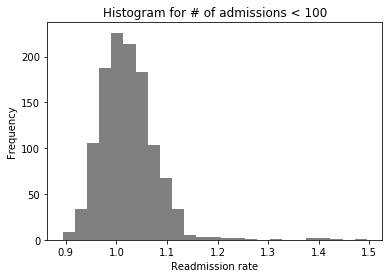

In [14]:
st_100=round((df100["Excess Readmission Ratio"]).std(),4)
print("The mean is {} and its standard deviation is {}".format(mean_100, st_100))
df100["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25,
    title = 'Histogram for # of admissions < 100').set_xlabel('Readmission rate')
plt.show()

The mean is 0.9783 and its standard deviation is 0.12


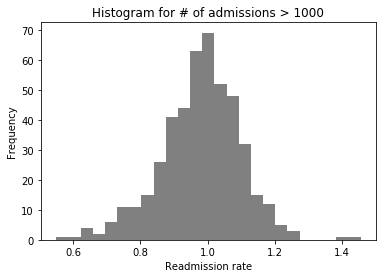

In [15]:
df1000["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25,
        title = 'Histogram for # of admissions > 1000').set_xlabel('Readmission rate')
st_1000=round((df1000["Excess Readmission Ratio"]).std(),4)
print("The mean is {} and its standard deviation is {}".format(mean_1000, st_1000))

Now compare two independent means, $H_0$ says that there is no difference between mu_1 and mu_2, that means that mu_1-mu_2=0

In [18]:
#####################     GROUP 1: <100    ##################
#####################     GROUP 2: >1000   ##################

#Parameter of interest  PI
PI = 0 # PI = mu_1-mu_2 (Null value)

# Point estimate
x_hat_1=mean_100
x_hat_2=mean_1000
PS = round(x_hat_1-x_hat_2,4)

# Standard Error: FORMULA and Variables
s_1=st_100
n_1=len(dfdis[(dfdis<100) & (dfdis>0)])
s_2=st_1000
n_2=len(dfdis[(dfdis<100)])
SE =(((s_1*s_1)/n_1)+((s_2*s_2)/n_2))**.5


# Z-score:
Z= PS/SE
#1-st.norm.cdf(Z)
print("Z-score:",Z)

Z-score: 11.764632322612469


In [19]:
#Calculating p value
p_values = st.norm.sf(abs(Z))
print(p_values)

2.9692245308e-32


The __Z-score__ is big enough to indicates that the chances that means would not be different are very low. The __p-value__ calculated using python st.norm.sf(abs(Z)) gives us a very low p-value making us confident to reject the null hypothesis.

Let's see now for __discharges<300:__

The mean is 1.0142 and its standard deviation is 0.0825


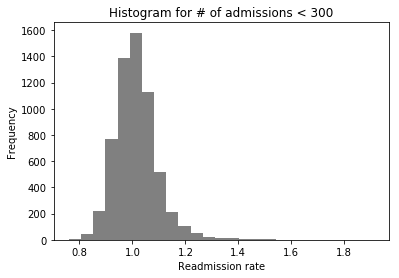

In [20]:
df300 = df[(df['Number of Discharges'] < 300) & (df['Number of Discharges'] > 0)]

df300["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25,
        title = 'Histogram for # of admissions < 300').set_xlabel('Readmission rate')
st_300=round((df300["Excess Readmission Ratio"]).std(),4)
mean_300= round(df300["Excess Readmission Ratio"].mean(),4)


print("The mean is {} and its standard deviation is {}".format(mean_300, st_300))

Let's calculate p-value now using has a null hypothesis: There is no diference between the means, the alternative supports the contrary in these two groups:

* **lower 300**
* **greater 1000**

In [21]:
#####################     GROUP 3: <300    ##################
#####################     GROUP 2: >1000   ##################

#Parameter of interest
PI = 0 # PI = mu_1-mu_2 (Null value)

# Point estimate
x_hat_3=mean_300
x_hat_2=mean_1000
PS = round(x_hat_3-x_hat_2,4)

# Standard Error: FORMULA and Variables
s_3=st_300
n_3=len(dfdis[(dfdis<300) & (dfdis>0)])
s_2=st_1000
n_2=len(dfdis[(dfdis<100)])
SE =(((s_3*s_3)/n_3)+((s_2*s_2)/n_2) )**.5
#round(SE,4)


# Z-score:
Z_2= PS/SE
#1-st.norm.cdf(Z)
print(Z_2)

10.169590134554486


In [22]:
p_values = st.norm.sf(abs(Z_2))

print("The p-value is:", p_values,"which is very small. The null hypothesis has to be rejected!")

The p-value is: 1.35523392431e-24 which is very small. The null hypothesis has to be rejected!


#### Discuss statistical significance and practical significance ####
The above calculations support the fact that there is a statistical difference between readmision rate for hospitals with a number of admissions lower than 100 and this number for those with more than 1000. The high Z-score and very tiny p-value support that hypothesis. Indeed, the same occurs when the number of addmissions are less than 300 and more than 1000. This is why I conclude that the difference is a statistically significant.

#### 5. Look at the scatterplot above. ####
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The scatter plot is the best plot to find correlation of two variables, however the biggest disadvantage of it is, it was designed to be used with very few data points but today we have millions and millions of data points to work with. If we look at the above scatter plot it is impossible to find indentify a single data point in the section where number of discharges ranges from 0 to 750.